In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('D:\data analysis\python\pr\zomato.csv')


In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape


(51717, 17)

#### Observation:
#### Their are 51717 rows and 17 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### Observation:
#### It seems their are some missing values in some of the columns lets check more

## Total nulls 


In [6]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### Observation:
#### Most of the nulls are present in the dishliked columns and then in the rate column. 
#### Lets see these nulls in percentage values

### Let's see null values in percentage

In [7]:
df.isna().mean().round(4)*100

url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

#### Some columns are irrelevent for our analysis like url,phone and listed_in (city) so lets drop those columns.



In [8]:
df.drop(['address','url','phone','listed_in(city)','menu_item'],axis=1,inplace=True)

In [9]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


### Let's rename some of the column name for better understanding


In [10]:
df.rename({'approx_cost(for two people)': 'approx_cost_for_two','rest_type':'restaurant_type','listed_in(type)':'type_of_meal'}, axis=1,inplace=True)

In [11]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'restaurant_type', 'dish_liked', 'cuisines', 'approx_cost_for_two',
       'reviews_list', 'type_of_meal'],
      dtype='object')

#### Now lets see how many duplicate values are present in the data

In [12]:
# Checking duplicate values
df.duplicated().sum()

12747

In [13]:
# Original shape
df.shape

(51717, 12)

## % of duplicate data

In [14]:
num_duplicates = df.duplicated().sum()

# calculate the total number of rows
num_rows = df.shape[0]

# calculate the percentage of duplicate rows
duplicate_pct = (num_duplicates / num_rows) * 100
duplicate_pct

24.64760136898892

##### Observations:
##### It seems like out of 51717 rows 12747 are duplicate data which is 25%

#### Let's create  a new data frame name updated_df where duplicate data are dropped

In [15]:
updated_df=df.drop_duplicates()

In [16]:
updated_df.shape

(38970, 12)

In [17]:
updated_df.duplicated().sum()

0

##### So now we have 38970 data after dropping duplicates

In [18]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38970 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 38970 non-null  object
 1   online_order         38970 non-null  object
 2   book_table           38970 non-null  object
 3   rate                 35120 non-null  object
 4   votes                38970 non-null  int64 
 5   location             38956 non-null  object
 6   restaurant_type      38808 non-null  object
 7   dish_liked           20594 non-null  object
 8   cuisines             38937 non-null  object
 9   approx_cost_for_two  38717 non-null  object
 10  reviews_list         38970 non-null  object
 11  type_of_meal         38970 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.9+ MB


#### Total Nulls

In [19]:
updated_df.isna().sum()

name                       0
online_order               0
book_table                 0
rate                    3850
votes                      0
location                  14
restaurant_type          162
dish_liked             18376
cuisines                  33
approx_cost_for_two      253
reviews_list               0
type_of_meal               0
dtype: int64

In [20]:
missing_prcnt=updated_df.isna().sum().sort_values(ascending=False)/len(updated_df)*100
missing_prcnt

dish_liked             47.154221
rate                    9.879394
approx_cost_for_two     0.649217
restaurant_type         0.415704
cuisines                0.084681
location                0.035925
name                    0.000000
online_order            0.000000
book_table              0.000000
votes                   0.000000
reviews_list            0.000000
type_of_meal            0.000000
dtype: float64

##### Visualisation of missing values in percentage

<AxesSubplot:>

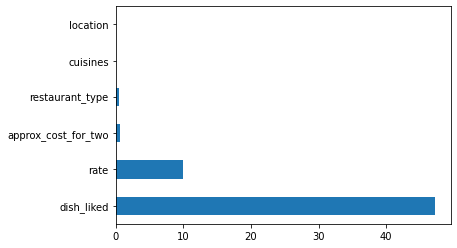

In [21]:

missing_prcnt[missing_prcnt !=0].plot(kind='barh')

## Let's investigate the rate  column

In [22]:
updated_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

##### Observation:
##### 1. It seems like the data is in string format, we need to convert them to decimals by removing
##### 2. We also need to remove string values like "NEW" and "-".

## Checking total '-' in columns

In [23]:

dash_rate=updated_df['rate']=='-'
dash_rate.sum()

69

## Checking total 'NEW'  in columns

In [24]:
new_rate=updated_df['rate']=='NEW'
new_rate.sum()

1429

In [25]:
updated_df['rate'].isna().sum()

3850

#### Observation:
#### Their are 69 '-' values, 1429 'NEW' values and 3850 null values

## Removing "-", "/", "NEW" from the rate column and converting to float

In [26]:
def rates(value):
    if (value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
updated_df['rate']=updated_df['rate'].apply(rates)


C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_19680/2590154922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['rate']=updated_df['rate'].apply(rates)


In [27]:
updated_df.describe()

,rate,votes
count,33622.000000,38970.000000
mean,3.731860,355.693970
std,0.451475,910.045274
min,1.800000,0.000000
25%,3.400000,12.000000
50%,3.800000,62.000000
75%,4.100000,271.000000
max,4.900000,16832.000000


In [28]:
updated_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [29]:
updated_df.isna().sum()

name                       0
online_order               0
book_table                 0
rate                    5348
votes                      0
location                  14
restaurant_type          162
dish_liked             18376
cuisines                  33
approx_cost_for_two      253
reviews_list               0
type_of_meal               0
dtype: int64

#### Observartion:
#### Since we replace the 'NEW' and'-' with nulls, the overall null value of rate has increased from 4261 to 5930

<AxesSubplot:>

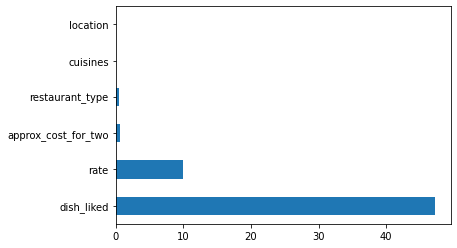

In [30]:
missing_prcnt[missing_prcnt !=0].plot(kind='barh')

In [31]:
updated_df.describe()

,rate,votes
count,33622.000000,38970.000000
mean,3.731860,355.693970
std,0.451475,910.045274
min,1.800000,0.000000
25%,3.400000,12.000000
50%,3.800000,62.000000
75%,4.100000,271.000000
max,4.900000,16832.000000


#### 1. The mean and the mode of rate column doesn't have much diff so we can fill up the null values with mean
#### 2. The standard deviation of rate column is around 0.45 which shows the datas  are clustered around the mean

In [32]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38970 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 38970 non-null  object 
 1   online_order         38970 non-null  object 
 2   book_table           38970 non-null  object 
 3   rate                 33622 non-null  float64
 4   votes                38970 non-null  int64  
 5   location             38956 non-null  object 
 6   restaurant_type      38808 non-null  object 
 7   dish_liked           20594 non-null  object 
 8   cuisines             38937 non-null  object 
 9   approx_cost_for_two  38717 non-null  object 
 10  reviews_list         38970 non-null  object 
 11  type_of_meal         38970 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.9+ MB


### Plotting the distrubution of rate column

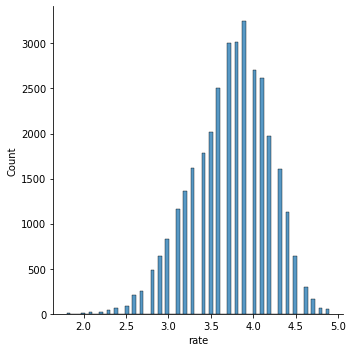

In [33]:
sns.displot(x=updated_df.rate)
plt.show()

## using mean to fill up null values

In [34]:
updated_df['rate'].fillna(round(updated_df['rate'].mean(),2),inplace=True)
updated_df['rate'].unique()

C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_19680/4253936583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['rate'].fillna(round(updated_df['rate'].mean(),2),inplace=True)


array([4.1 , 3.8 , 3.7 , 3.6 , 4.6 , 4.  , 4.2 , 3.9 , 3.1 , 3.  , 3.2 ,
       3.3 , 2.8 , 4.4 , 4.3 , 3.73, 2.9 , 3.5 , 2.6 , 3.4 , 4.5 , 2.5 ,
       2.7 , 4.7 , 2.4 , 2.2 , 2.3 , 4.8 , 4.9 , 2.1 , 2.  , 1.8 ])

In [35]:
updated_df['rate'].isna().sum()

0

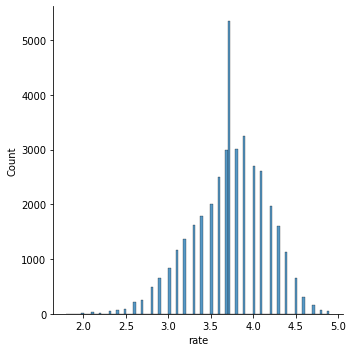

In [36]:
sns.displot(x=updated_df.rate)
plt.show()

In [37]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [38]:
updated_df.isna().sum()

name                       0
online_order               0
book_table                 0
rate                       0
votes                      0
location                  14
restaurant_type          162
dish_liked             18376
cuisines                  33
approx_cost_for_two      253
reviews_list               0
type_of_meal               0
dtype: int64

###  Droping  null values from location,cost_for_two,restaurant_type and cuisines

In [39]:

updated_df.dropna(subset=['location','cuisines', 'approx_cost_for_two', 'restaurant_type'],inplace=True)


C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_19680/2632129895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df.dropna(subset=['location','cuisines', 'approx_cost_for_two', 'restaurant_type'],inplace=True)


In [40]:
updated_df.isna().sum()

name                       0
online_order               0
book_table                 0
rate                       0
votes                      0
location                   0
restaurant_type            0
dish_liked             18136
cuisines                   0
approx_cost_for_two        0
reviews_list               0
type_of_meal               0
dtype: int64

### The approx_cost_for_two column is in object format so we need to change it to integer

In [41]:
updated_df['approx_cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

## Converting to integer by removing commas

In [42]:
def comma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)
updated_df['approx_cost_for_two'] = updated_df['approx_cost_for_two'].apply(comma)
updated_df['approx_cost_for_two'].unique()




C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_19680/3457196647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['approx_cost_for_two'] = updated_df['approx_cost_for_two'].apply(comma)


array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

In [43]:
updated_df['approx_cost_for_two'].describe()

count    38557.000000
mean       593.795083
std        458.911309
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost_for_two, dtype: float64

In [44]:
updated_df.isna().mean().round(4)*100

name                    0.00
online_order            0.00
book_table              0.00
rate                    0.00
votes                   0.00
location                0.00
restaurant_type         0.00
dish_liked             47.04
cuisines                0.00
approx_cost_for_two     0.00
reviews_list            0.00
type_of_meal            0.00
dtype: float64

## Replacing null values with 'Not Avialable' in dish_liked column'

In [45]:
updated_df['dish_liked'].fillna('Not Available',inplace=True)


C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_19680/971125774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['dish_liked'].fillna('Not Available',inplace=True)


In [46]:
updated_df.isna().sum()

name                   0
online_order           0
book_table             0
rate                   0
votes                  0
location               0
restaurant_type        0
dish_liked             0
cuisines               0
approx_cost_for_two    0
reviews_list           0
type_of_meal           0
dtype: int64

In [47]:
updated_df['reviews_list'].iloc[1]

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

## Let's Cleaning the review column

In [48]:
import re

### Removing unnecessary characters

In [49]:
updated_df['reviews_list']=updated_df['reviews_list'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x)).replace({'\d+':'', 'Rated':'', 'RATEDn':''},regex=True)  ## to remove uinnecessary characters

C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_19680/2396015627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['reviews_list']=updated_df['reviews_list'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x)).replace({'\d+':'', 'Rated':'', 'RATEDn':''},regex=True)  ## to remove uinnecessary characters


In [50]:
updated_df['reviews_list'].iloc[1]

'    Had been here for dinner with family Turned out to be a good choose suitable for all ages of people Can try this place We liked the most was their starters Service is good Prices are affordable Will recommend this restaurant for early dinner The place is little noisy     The ambience is really nice staff is courteous The price is pretty high for the quantity but overall the experience was fine The quality of food is nice but nothing extraordinary They also have buffetonly veg     I felt good is little expensive for the quantity they serve and In terms of taste is decent There is nothing much to talk about the ambience regular casual dining restaurant where you can take your family for dinner or lunch If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers     I was looking for a quite place to spend some time with family and as well wanted to try some new place Since I was at Bana

In [51]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Very good restaurant in neighbourhood Buff...,Buffet


In [52]:
updated_df.groupby(['dish_liked'])['dish_liked'].count().sort_values(ascending=False)[:10]

dish_liked
Not Available       18136
Biryani               144
Chicken Biryani        61
Friendly Staff         54
Paratha                54
Waffles                48
Masala Dosa            41
Rooftop Ambience       40
Coffee                 36
Pizza                  34
Name: dish_liked, dtype: int64

## Visulalising the data

####  Restautarunt with the most chains

In [53]:
most_restaurant_chain=updated_df['name'].value_counts()[:10]


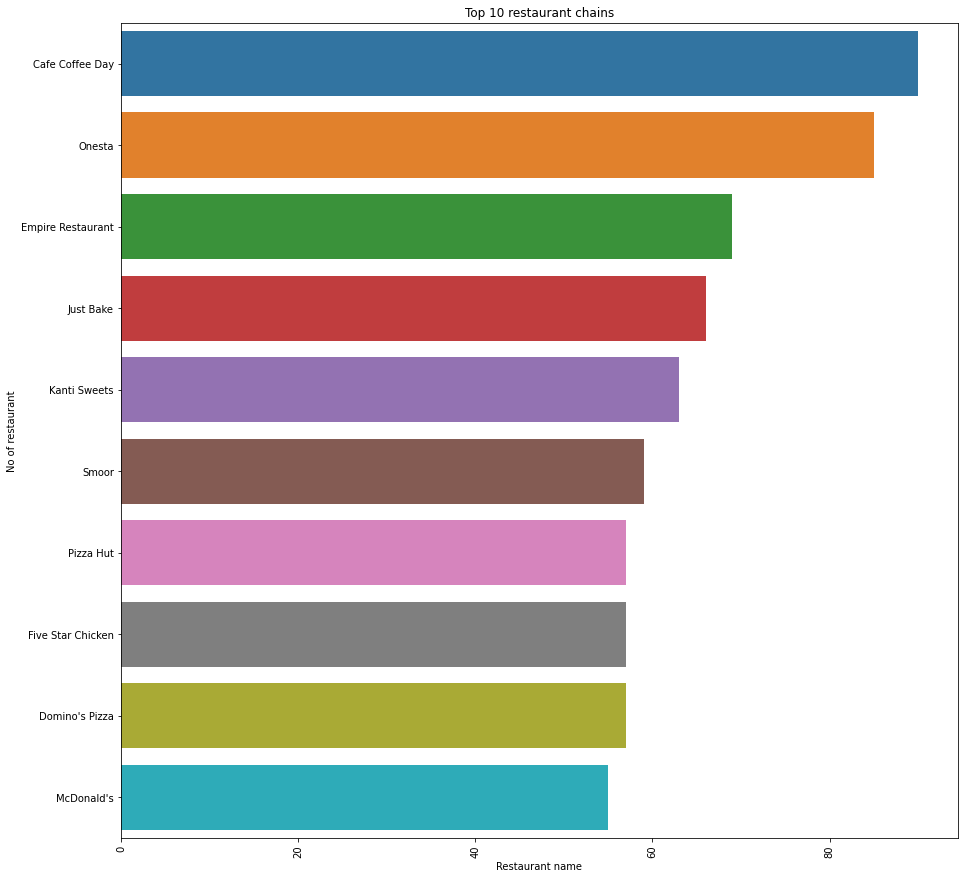

In [54]:

plt.figure(figsize=(15,15))
sns.barplot(x=most_restaurant_chain.values, y=most_restaurant_chain.index,orient='h')
plt.xticks(rotation=90)
plt.xlabel('Restaurant name')
plt.ylabel('No of restaurant')
plt.title('Top 10 restaurant chains')
plt.show()


#### Top 10 most voted restaurant

In [55]:
most_voted_restaurant=updated_df.groupby(['name'])['votes'].sum().sort_values(ascending=False)[:10]

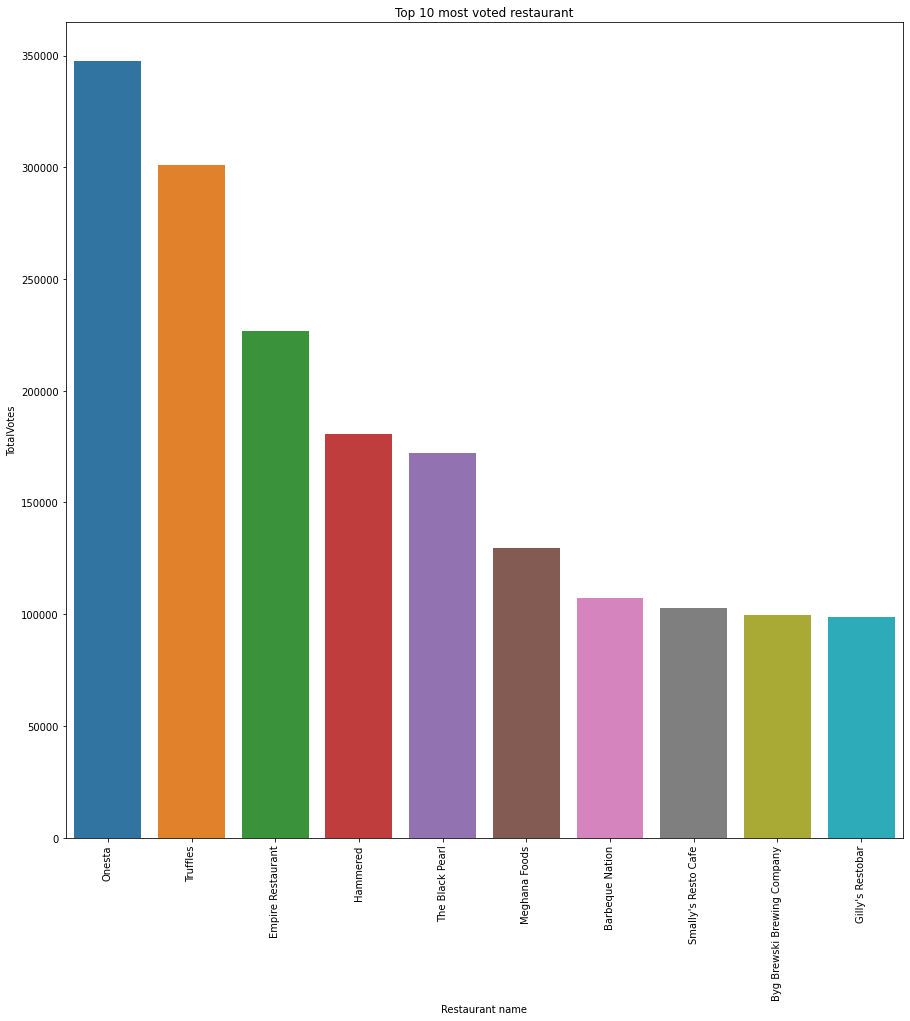

In [56]:

plt.figure(figsize=(15,15))
sns.barplot(x=most_voted_restaurant.index, y=most_voted_restaurant.values)
plt.xticks(rotation=90)
plt.xlabel('Restaurant name')
plt.ylabel('TotalVotes')
plt.title('Top 10 most voted restaurant')
plt.show()


### Locations  with the most amount of restaurant

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

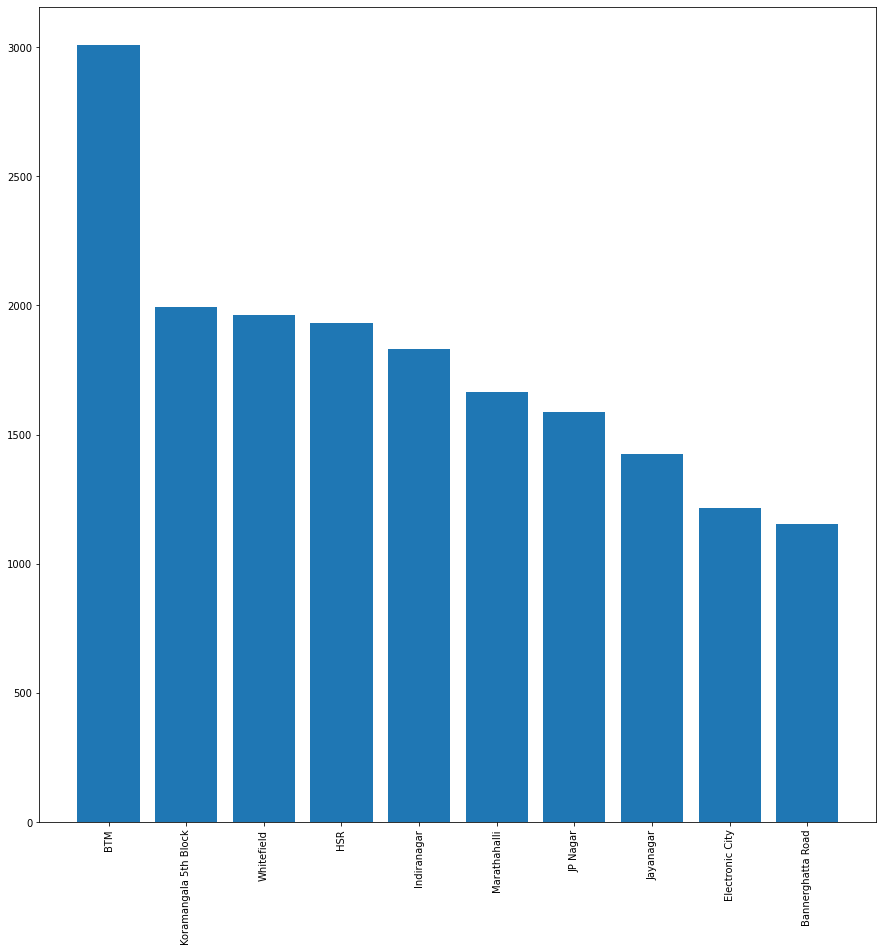

In [57]:
most_located_restaurant=updated_df.groupby(['location'])['name'].count().sort_values(ascending=False)[:10]
most_located_restaurant
plt.figure(figsize=(15,15))

plt.bar(most_located_restaurant.index,most_located_restaurant.values)
plt.xticks(rotation=90)


In [58]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Very good restaurant in neighbourhood Buff...,Buffet


### common restaurant type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

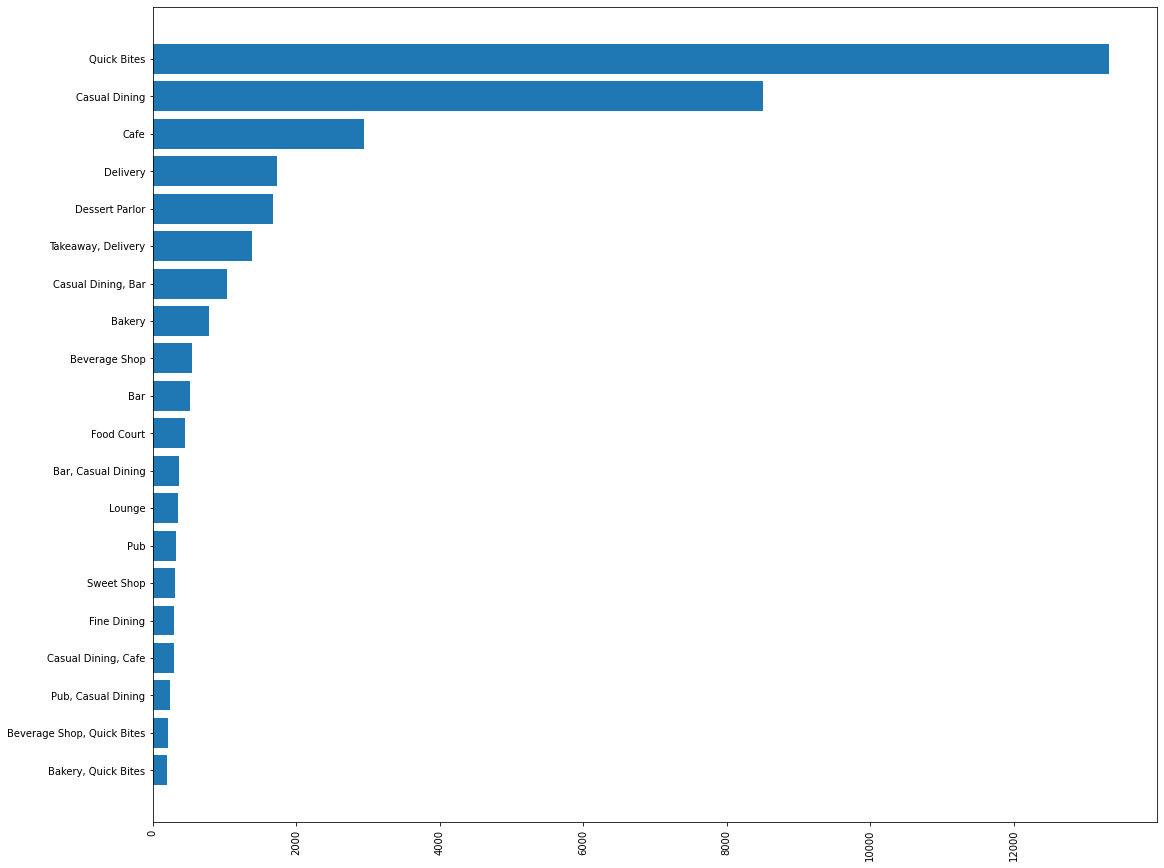

In [59]:
most_common_restaurant_type=updated_df.groupby(['restaurant_type'])['restaurant_type'].count().sort_values(ascending=False)[:20]
most_common_restaurant_type = most_common_restaurant_type.sort_values(ascending=True)

plt.figure(figsize=(18,15))

plt.barh(most_common_restaurant_type.index,most_common_restaurant_type.values)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


### Type of meals provieded the most

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

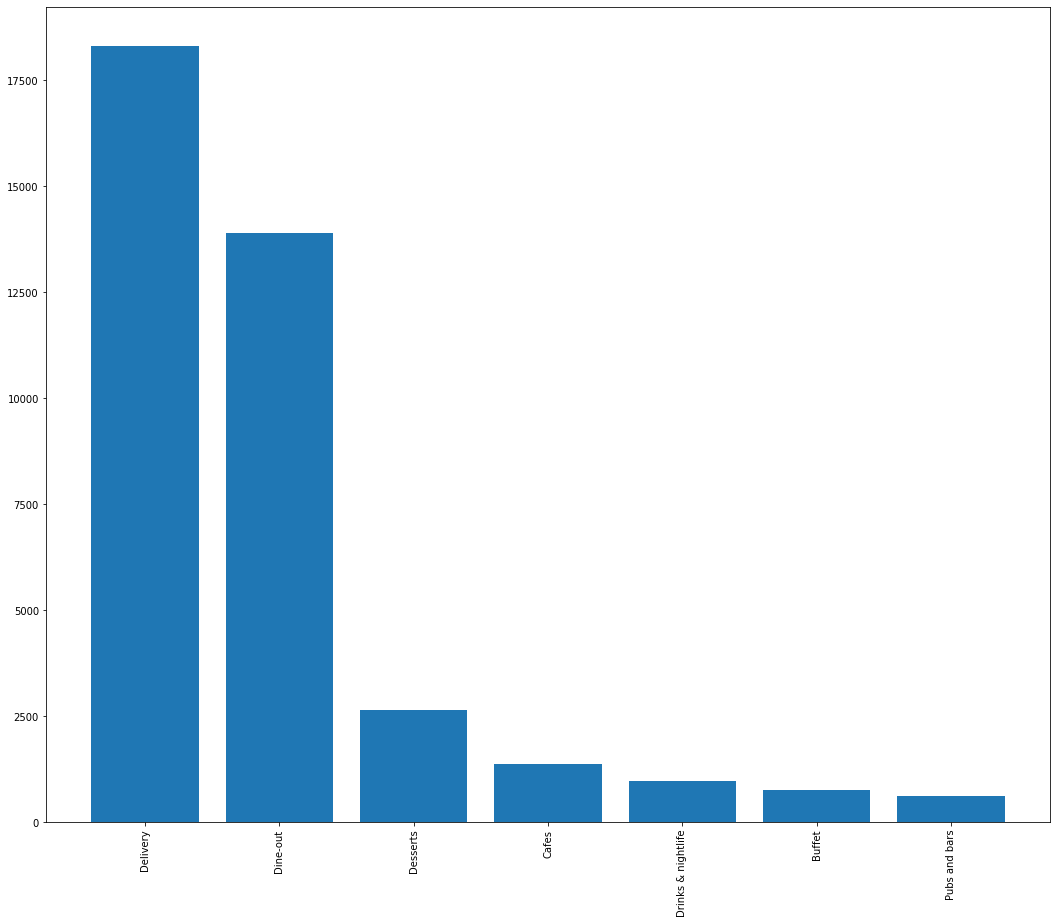

In [60]:
most_voted_type_of_meal=updated_df.groupby(['type_of_meal'])['type_of_meal'].count().sort_values(ascending=False)[:10]
most_voted_type_of_meal
plt.figure(figsize=(18,15))

plt.bar(most_voted_type_of_meal.index,most_voted_type_of_meal.values)
plt.xticks(rotation=90)

In [61]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Very good restaurant in neighbourhood Buff...,Buffet


###  Online Vs offline Order

<AxesSubplot:xlabel='online_order', ylabel='count'>

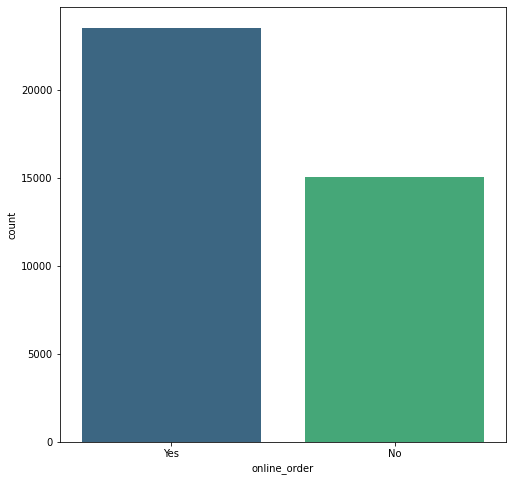

In [62]:
plt.figure(figsize=(8,8))

sns.countplot(x='online_order', data=updated_df, palette='viridis')

#### Booking table

<AxesSubplot:xlabel='book_table', ylabel='count'>

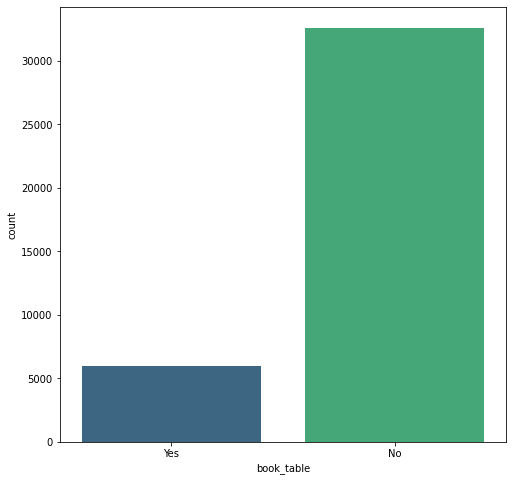

In [63]:
plt.figure(figsize=(8,8))

sns.countplot(x='book_table', data=updated_df, palette='viridis')

### Which cuisines are found most in the bangalore region?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'Bakery, Desserts'),
  Text(4, 0, 'Biryani'),
  Text(5, 0, 'Fast Food'),
  Text(6, 0, 'South Indian, North Indian, Chinese'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Cafe'),
  Text(9, 0, 'Bakery'),
  Text(10, 0, 'Chinese'),
  Text(11, 0, 'Ice Cream, Desserts'),
  Text(12, 0, 'Chinese, North Indian'),
  Text(13, 0, 'Mithai, Street Food'),
  Text(14, 0, 'North Indian, Chinese, Biryani'),
  Text(15, 0, 'Desserts, Ice Cream'),
  Text(16, 0, 'North Indian, South Indian'),
  Text(17, 0, 'North Indian, South Indian, Chinese'),
  Text(18, 0, 'Finger Food'),
  Text(19, 0, 'South Indian, North Indian')])

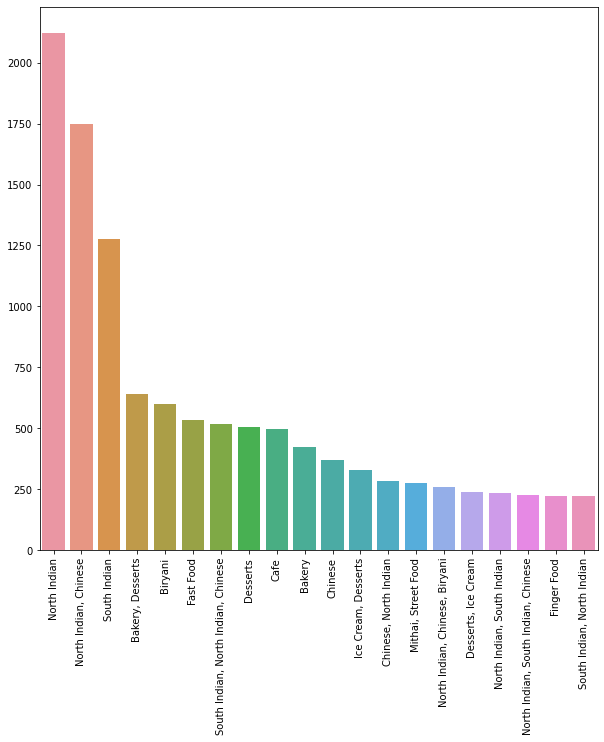

In [64]:
cuisines_available=updated_df['cuisines'].value_counts()[:20]

plt.figure(figsize=(10,10))
sns.barplot(x=cuisines_available.index, y=cuisines_available.values)
plt.xticks(rotation=90)

#### Although banglore is in south most of the restaurant cuisines are North Indian, South Indian cuisine comes at 3rd

In [65]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Very good restaurant in neighbourhood Buff...,Buffet


In [66]:
grouped_booking=updated_df.groupby(['location','book_table'])['name'].count().reset_index()[:50]
grouped_booking=pd.pivot_table(grouped_booking,values=None,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)

grouped_booking.head()

name     
book_table           No  Yes
location                    
BTM                2861  145
Banashankari        583   52
Banaswadi           465    6
Bannerghatta Road  1063   91
Basavanagudi        482   12

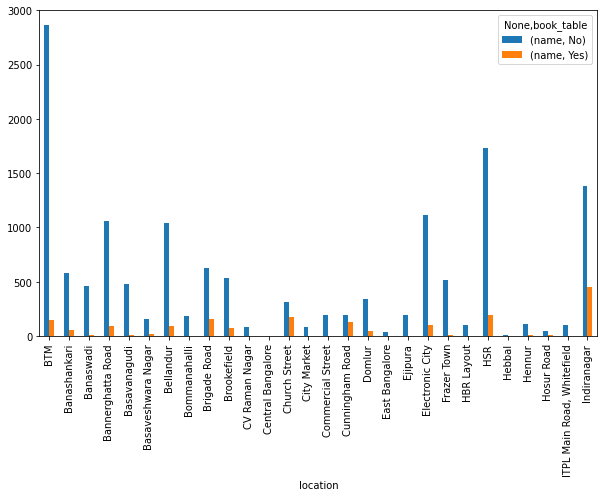

In [67]:

ax = grouped_booking.plot(kind='bar', stacked=False,figsize=(10,6))
plt.show()

In [68]:
grouped_online_order=updated_df.groupby(['location','online_order'])['name'].count().reset_index()[:50]
grouped_online_order=pd.pivot_table(grouped_online_order,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)

grouped_online_order.head()

name      
online_order        No   Yes
location                    
BTM                924  2082
Banashankari       276   359
Banaswadi          216   255
Bannerghatta Road  419   735
Basavanagudi       193   301

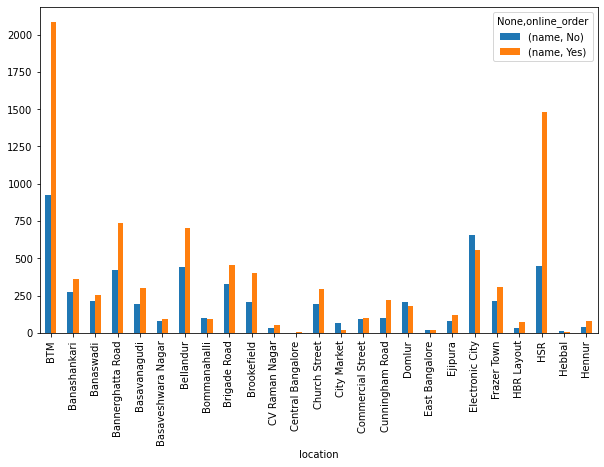

In [69]:
ax = grouped_online_order.plot(kind='bar', stacked=False,figsize=(10,6))
plt.show()

### Visualising  dish liked

In [70]:
liked_dish=updated_df['dish_liked'].value_counts()
liked_dish=liked_dish.drop('Not Available')

In [71]:
top_10_liked_dish=liked_dish[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

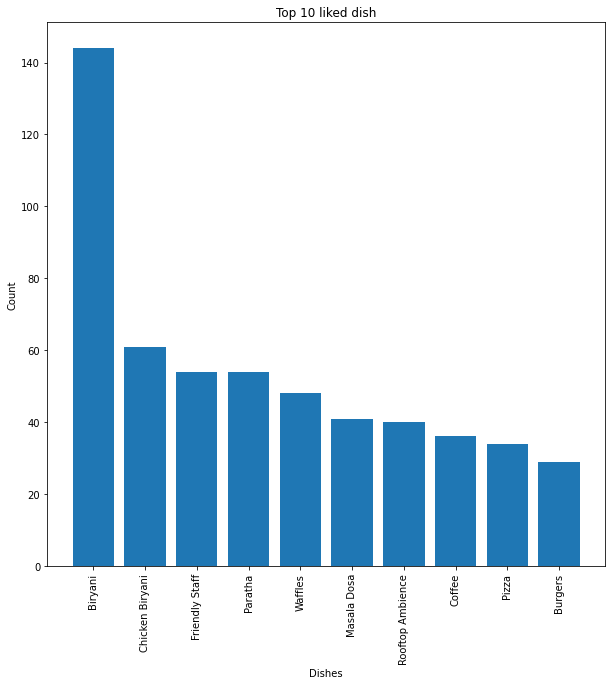

In [72]:
plt.figure(figsize=(10,10))
plt.title('Top 10 liked dish')

plt.bar(top_10_liked_dish.index,top_10_liked_dish.values)
plt.xlabel('Dishes')
plt.ylabel('Count')
plt.xticks(rotation=90)


In [73]:
updated_df.head(2)

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet


In [74]:
updated_df['reviews_list']


0            A beautiful place to dine inThe interiors ...
1            Had been here for dinner with family Turne...
2            Ambience is not that good enough and its n...
3            Great food and proper Karnataka style full...
4            Very good restaurant in neighbourhood Buff...
                               ...                        
51712        Food and service are incomparably excellen...
51713                                                     
51714                                                     
51715        Nice and friendly place and staff is aweso...
51716        Great ambience  looking nice good selectio...
Name: reviews_list, Length: 38557, dtype: object

In [81]:
updated_df.head(1)

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet


### Reviews of the Top 5 highest rated restaurant

Word cloud for Asia Kitchen By Mainland China


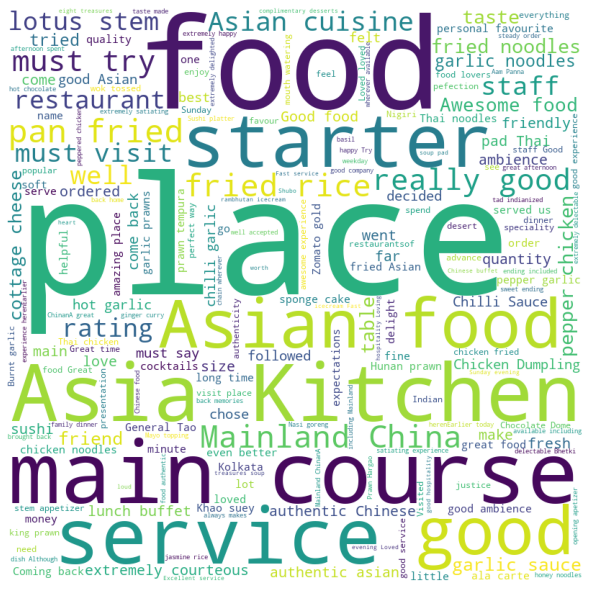

Word cloud for Belgian Waffle Factory


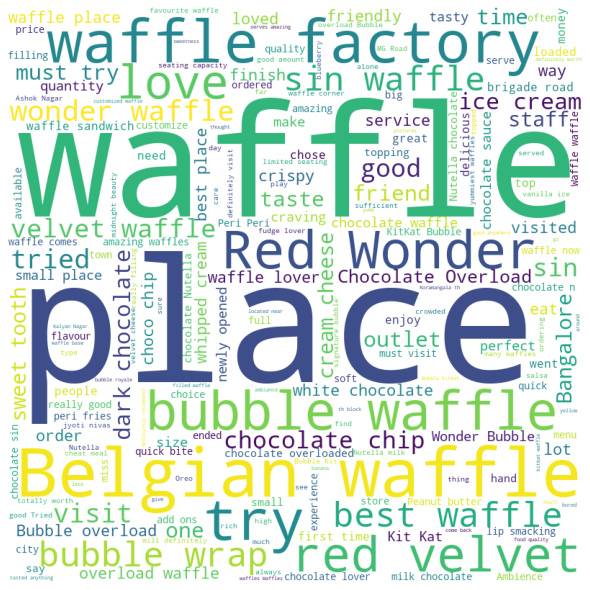

Word cloud for Byg Brewski Brewing Company


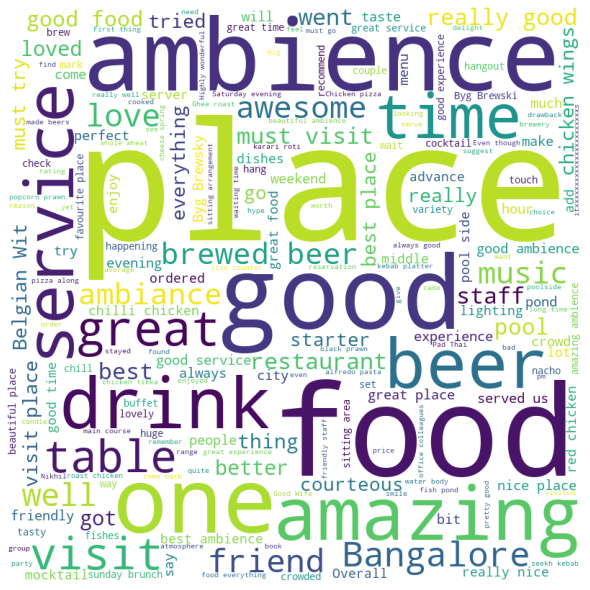

Word cloud for Flechazo


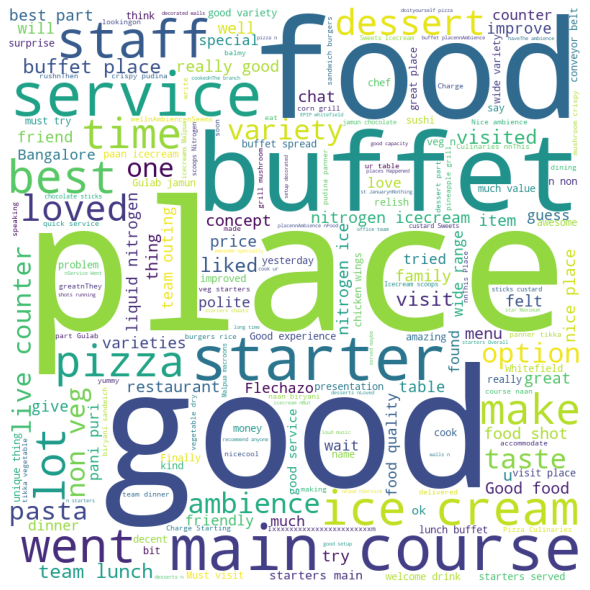

Word cloud for Punjab Grill


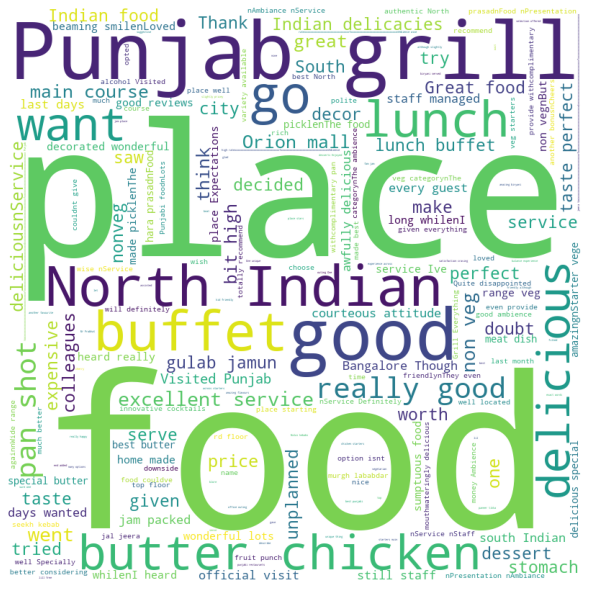

In [119]:

# Get the names of the highest-rated restaurants
highest_rated_restaurants = updated_df.groupby('name')['rate'].max().sort_values(ascending=False).head().index

# Filter the original dataframe to include only the reviews for the highest-rated restaurants
highest_rated_reviews = updated_df[updated_df['name'].isin(highest_rated_restaurants)]['reviews_list']

# Apply generate_wordcloud function to the filtered reviews
for name, reviews in highest_rated_reviews.groupby(updated_df['name']):
    reviews_text = ' '.join(reviews.tolist())
    print('Word cloud for', name)
    generate_wordcloud(reviews_text)


### Lets create wordlcloud of liked_dishes for top rated restaurant

Word cloud for Asia Kitchen By Mainland China


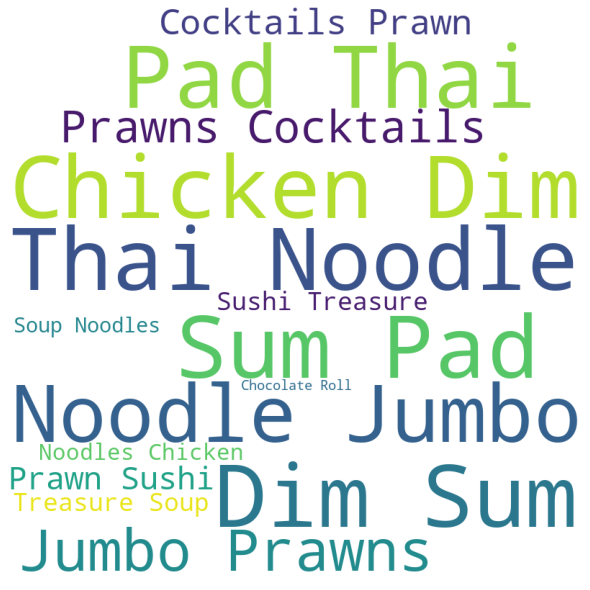

Word cloud for Belgian Waffle Factory


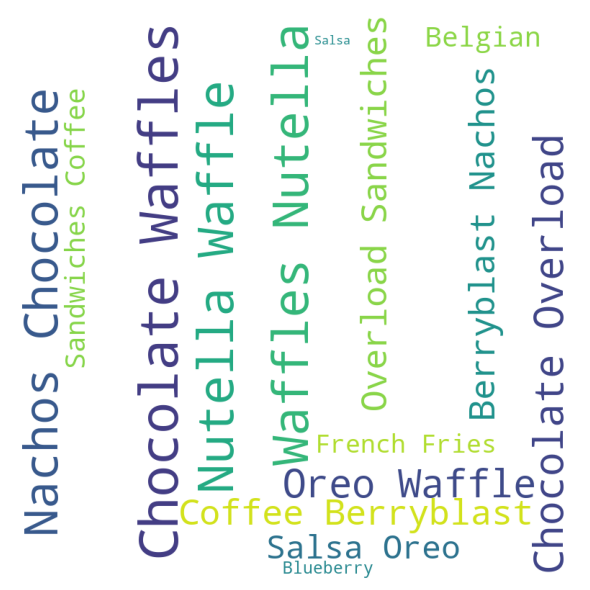

Word cloud for Byg Brewski Brewing Company


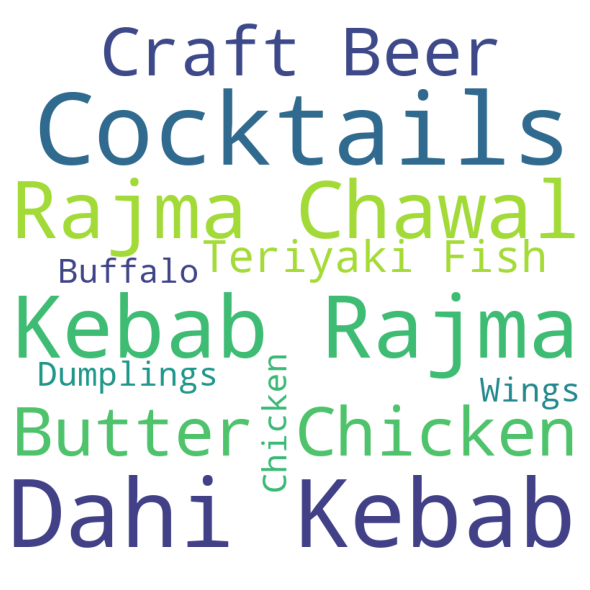

Word cloud for Flechazo


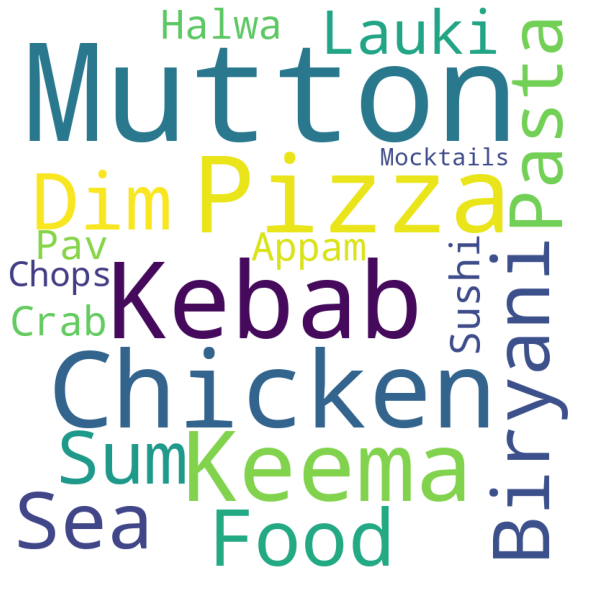

Word cloud for Punjab Grill


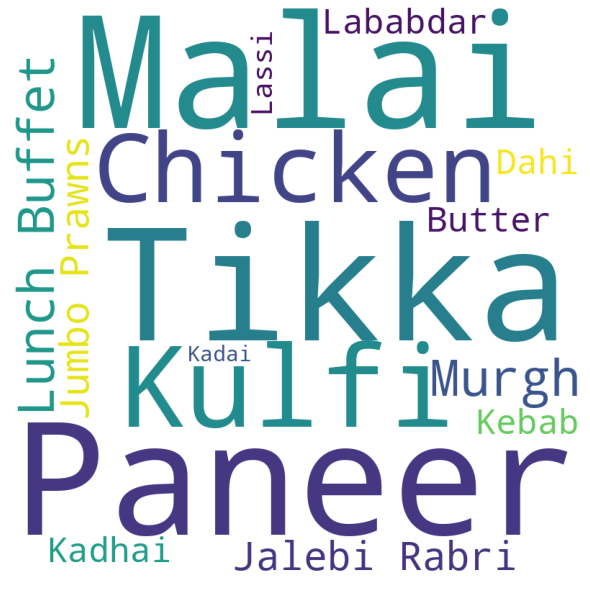

In [105]:
# Get the names of the highest-rated restaurants
highest_rated_restaurants = updated_df.groupby('name')['rate'].max().sort_values(ascending=False).head().index

# Filter the original dataframe to include only the reviews for the highest-rated restaurants
highest_rated_reviews = updated_df[updated_df['name'].isin(highest_rated_restaurants)]['dish_liked']

# Apply generate_wordcloud function to the filtered reviews
for name, reviews in highest_rated_reviews.groupby(updated_df['name']):
    reviews_text = ' '.join(reviews.tolist())
    print('Word cloud for', name)
    generate_wordcloud(reviews_text)
